## Check Carmen and Ross's LRR/Ank PCR

This produced beautiful results:

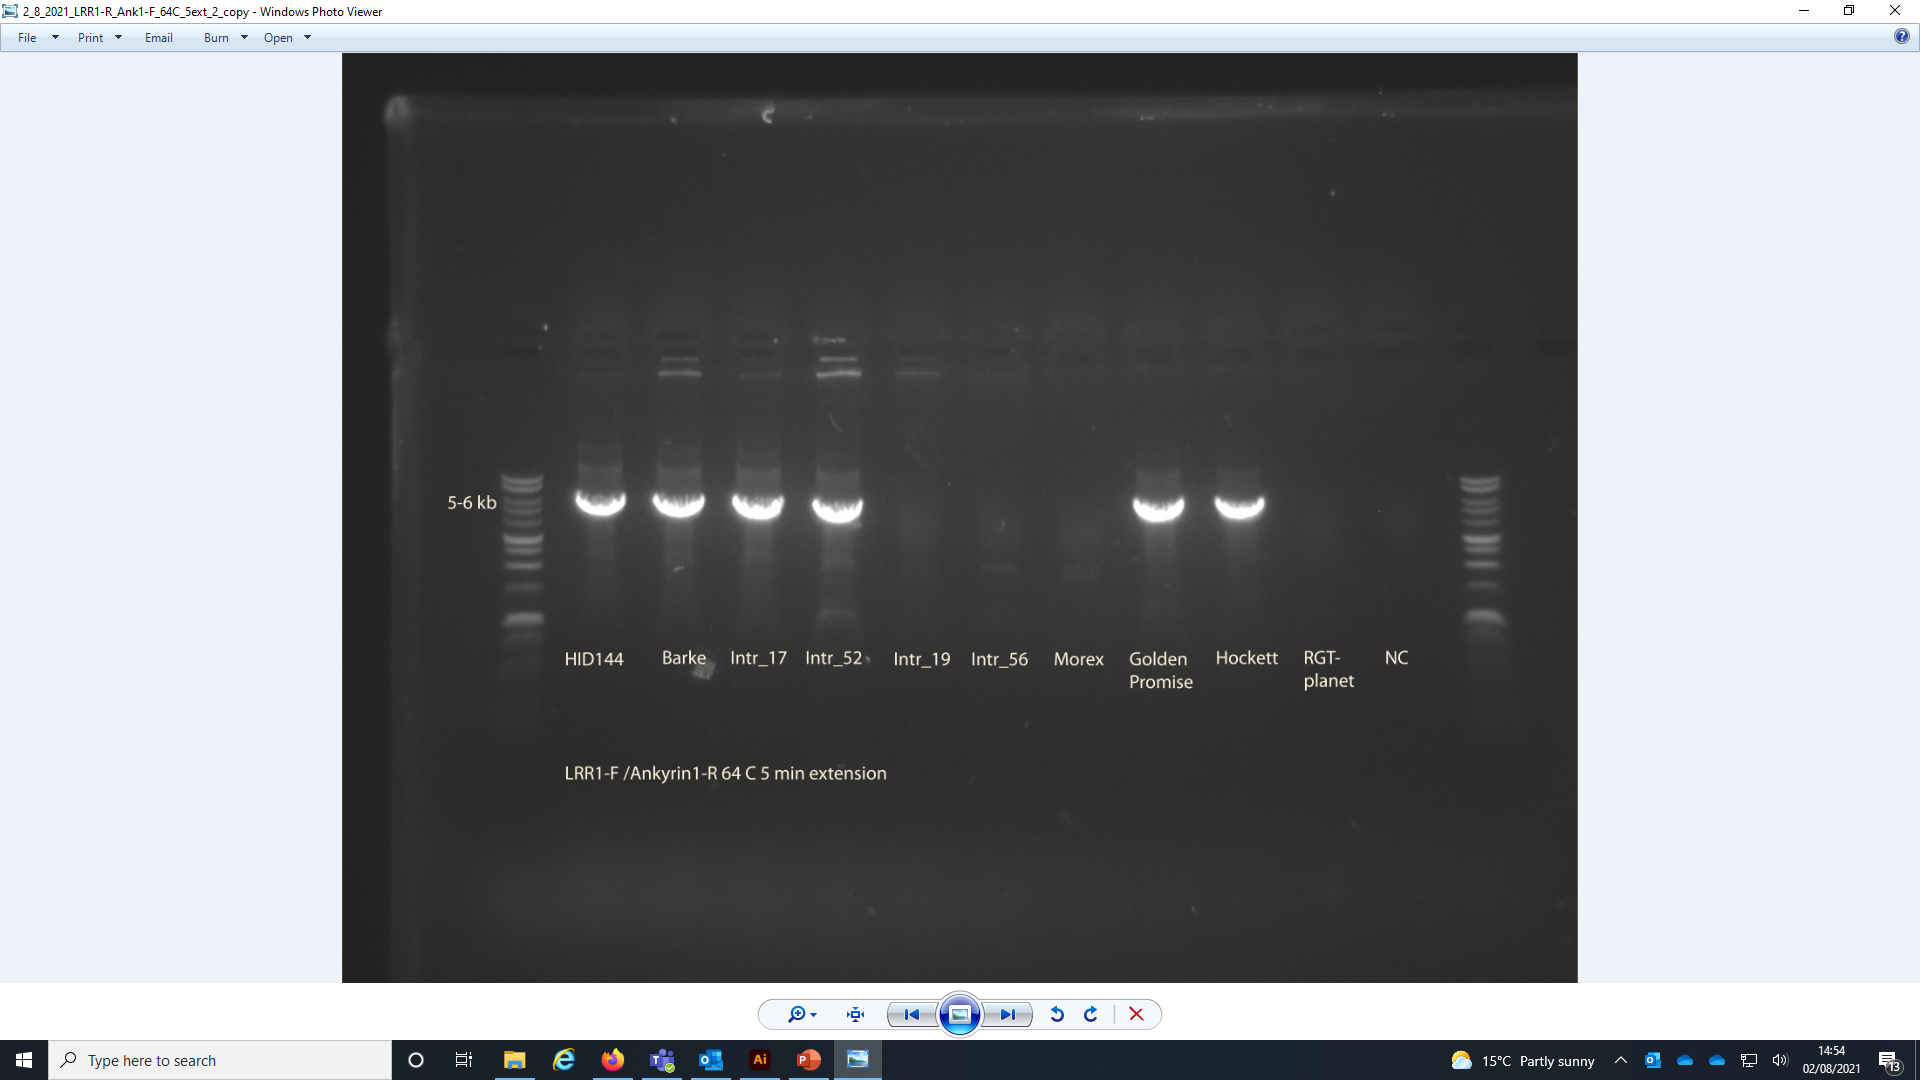

In [1]:
from IPython.display import Image
Image(filename='/cluster/db/mecoulter/Ross/figures/MicrosoftTeams-image.png')

* This is exactly as expected, as Int19 and Int56 do not have the gene. Clear the gene is present in HID144 and Intr_17/52, a much clearer result then previous PCRs

In [2]:
import os
import subprocess
os.chdir("/cluster/db/mecoulter/Ross/")

In [3]:
seq_files = []
for file in os.listdir("./results_28-7-21_run75/"):
    if file.startswith("._") or file.endswith(".ab1"):
        continue
    print(file)
    seq_files.append(file)

SQ21-197_LRR1-Ank_Ank1_R_D05_021.seq
SQ21-197_LRR2-Ank_Ank1_R_F05_019.seq
SQ21-197_LRR2-Ank_LRR2_F_E05_020.seq
SQ21-197_LRR1-Ank_LRR1_F_C05_022.seq


In [5]:
genome = "/cluster/db/mecoulter/genomes/genomes/180903_Barke_Unfiltered_chloro_clean_pseudomolecules_v1.fasta"
genome_name = genome.split("/")[-1].replace(".fasta", "")


for file in seq_files:
    print(f"Running BLAST on sequence from {file}")
    file_name = "_".join(file.split("_")[1:4]) #e.g Ank1_52_R
    print(f"file name is {file_name}")
    subprocess.run(f"blastn -task blastn-short -query ./results_28-7-21_run75/{file}  -db {genome} -outfmt 10 -out {file_name}_blast.csv", shell=True, check=True)

Running BLAST on sequence from SQ21-197_LRR1-Ank_Ank1_R_D05_021.seq
file name is LRR1-Ank_Ank1_R
Running BLAST on sequence from SQ21-197_LRR2-Ank_Ank1_R_F05_019.seq
file name is LRR2-Ank_Ank1_R
Running BLAST on sequence from SQ21-197_LRR2-Ank_LRR2_F_E05_020.seq
file name is LRR2-Ank_LRR2_F
Running BLAST on sequence from SQ21-197_LRR1-Ank_LRR1_F_C05_022.seq
file name is LRR1-Ank_LRR1_F


In [7]:
import pandas as pd

header_outfmt10 = ["name", "chromosome", "percent id", "match_length", "mismatches", "gap_openings", "Query start","Query end", "subject_start", "subject_end", "evalue","bitscore"]
blast = pd.read_csv("LRR1-Ank_Ank1_R_blast.csv", header=None)
blast.columns = header_outfmt10
blast.head()

,name,chromosome,percent id,match_length,mismatches,gap_openings,Query start,Query end,subject_start,subject_end,evalue,bitscore
0,Query_1,chr3H,99.247,797,0,6,7,797,36890113,36889317,0.000000e+00,1485.0
1,Query_1,chr3H,97.468,158,4,0,219,376,608190093,608190250,4.770000e-73,281.0
2,Query_1,chr3H,93.827,162,10,0,214,375,27526406,27526567,4.110000e-61,242.0
3,Query_1,chr3H,93.902,164,9,1,215,377,225505826,225505989,6.420000e-60,238.0
4,Query_1,chr3H,95.238,147,7,0,214,360,586887744,586887598,2.540000e-59,236.0


In [8]:
blast = pd.read_csv("LRR2-Ank_Ank1_R_blast.csv", header=None)
blast.columns = header_outfmt10
blast.head()

,name,chromosome,percent id,match_length,mismatches,gap_openings,Query start,Query end,subject_start,subject_end,evalue,bitscore
0,Query_1,chr3H,97.439,781,16,4,25,801,36890090,36889310,0.000000e+00,1388.0
1,Query_1,chr3H,94.937,158,8,0,215,372,608190093,608190250,6.870000e-66,258.0
2,Query_1,chr3H,91.975,162,13,0,210,371,27526406,27526567,2.430000e-56,226.0
3,Query_1,chr3H,83.988,331,51,2,417,746,44137909,44137580,1.500000e-54,220.0
4,Query_1,chr3H,91.463,164,13,1,211,373,225505826,225505989,9.230000e-53,214.0


In [9]:
blast = pd.read_csv("LRR2-Ank_LRR2_F_blast.csv", header=None)
blast.columns = header_outfmt10
blast.head()

,name,chromosome,percent id,match_length,mismatches,gap_openings,Query start,Query end,subject_start,subject_end,evalue,bitscore
0,Query_1,chr3H,90.606,841,65,13,8,842,36885547,36886379,0.000000e+00,1029.0
1,Query_1,chr3H,90.566,53,5,0,649,701,192434322,192434270,5.360000e-08,65.9
2,Query_1,chr3H,91.667,36,3,0,594,629,192434370,192434335,1.300000e-02,48.1
3,Query_1,chr5H,80.714,420,78,1,281,700,584204048,584204464,2.120000e-44,186.0
4,Query_1,chr5H,100.000,24,0,0,651,674,513645724,513645747,1.300000e-02,48.1


In [10]:
blast = pd.read_csv("LRR1-Ank_LRR1_F_blast.csv", header=None)
blast.columns = header_outfmt10
blast.head()

,name,chromosome,percent id,match_length,mismatches,gap_openings,Query start,Query end,subject_start,subject_end,evalue,bitscore
0,Query_1,chr3H,98.920,833,2,7,10,835,36885547,36886379,0.000000e+00,1528.0
1,Query_1,chr3H,79.104,201,42,0,58,258,192434869,192434669,1.350000e-08,67.9
2,Query_1,chr3H,90.566,53,5,0,642,694,192434322,192434270,5.320000e-08,65.9
3,Query_1,chr3H,91.667,36,3,0,587,622,192434370,192434335,1.200000e-02,48.1
4,Query_1,chr3H,100.000,20,0,0,710,729,265524405,265524424,3.000000e+00,40.1


* Look fine

* Check 17 and 52:

In [11]:

import os
import subprocess
os.chdir("/cluster/db/mecoulter/Ross/")

seq_files = []
for file in os.listdir("./results_4-8-21_run112/"):
    if file.startswith("._") or file.endswith(".ab1"):
        continue
    print(file)
    seq_files.append(file)

SQ21-205_LRR1-Ank_Int_52_Ank1_R_F03_011.seq
SQ21-205_LRR1-Ank_Int_17_LRR1_F_C03_014.seq
SQ21-205_LRR1-Ank_Int_17_Ank1_R_D03_013.seq
SQ21-205_LRR1-Ank_Int_52_LRR2_F_E03_012.seq


In [12]:
for file in seq_files:
    print(f"Running BLAST on sequence from {file}")
    file_name = "_".join(file.split("_")[1:4]) #e.g Ank1_52_R
    print(f"file name is {file_name}")
    subprocess.run(f"blastn -task blastn-short -query ./results_4-8-21_run112/{file}  -db {genome} -outfmt 10 -out {file_name}_blast.csv", shell=True, check=True)

Running BLAST on sequence from SQ21-205_LRR1-Ank_Int_52_Ank1_R_F03_011.seq
file name is LRR1-Ank_Int_52
Running BLAST on sequence from SQ21-205_LRR1-Ank_Int_17_LRR1_F_C03_014.seq
file name is LRR1-Ank_Int_17
Running BLAST on sequence from SQ21-205_LRR1-Ank_Int_17_Ank1_R_D03_013.seq
file name is LRR1-Ank_Int_17
Running BLAST on sequence from SQ21-205_LRR1-Ank_Int_52_LRR2_F_E03_012.seq
file name is LRR1-Ank_Int_52


In [13]:
blast = pd.read_csv("LRR1-Ank_Int_52_blast.csv", header=None)
blast.columns = header_outfmt10
blast.head()

,name,chromosome,percent id,match_length,mismatches,gap_openings,Query start,Query end,subject_start,subject_end,evalue,bitscore
0,Query_1,chr3H,98.226,789,12,2,13,799,36885547,36886335,0.000000e+00,1447.0
1,Query_1,chr3H,81.102,127,24,0,135,261,192434795,192434669,8.430000e-07,61.9
2,Query_1,chr3H,88.679,53,6,0,645,697,192434322,192434270,1.320000e-05,58.0
3,Query_1,chr3H,91.667,36,3,0,590,625,192434370,192434335,1.300000e-02,48.1
4,Query_1,chr5H,83.180,654,107,1,43,696,584203814,584204464,5.260000e-116,424.0


In [14]:
blast = pd.read_csv("LRR1-Ank_Int_17_blast.csv", header=None)
blast.columns = header_outfmt10
blast.head()

,name,chromosome,percent id,match_length,mismatches,gap_openings,Query start,Query end,subject_start,subject_end,evalue,bitscore
0,Query_1,chr3H,98.417,821,6,6,13,827,36890113,36889294,0.000000e+00,1485.0
1,Query_1,chr3H,97.468,158,4,0,226,383,608190093,608190250,4.890000e-73,281.0
2,Query_1,chr3H,93.827,162,10,0,221,382,27526406,27526567,4.210000e-61,242.0
3,Query_1,chr3H,93.902,164,9,1,222,384,225505826,225505989,6.570000e-60,238.0
4,Query_1,chr3H,95.238,147,7,0,221,367,586887744,586887598,2.600000e-59,236.0


In [15]:
blast = pd.read_csv("LRR1-Ank_Int_17_blast.csv", header=None)
blast.columns = header_outfmt10
blast.head()

,name,chromosome,percent id,match_length,mismatches,gap_openings,Query start,Query end,subject_start,subject_end,evalue,bitscore
0,Query_1,chr3H,98.417,821,6,6,13,827,36890113,36889294,0.000000e+00,1485.0
1,Query_1,chr3H,97.468,158,4,0,226,383,608190093,608190250,4.890000e-73,281.0
2,Query_1,chr3H,93.827,162,10,0,221,382,27526406,27526567,4.210000e-61,242.0
3,Query_1,chr3H,93.902,164,9,1,222,384,225505826,225505989,6.570000e-60,238.0
4,Query_1,chr3H,95.238,147,7,0,221,367,586887744,586887598,2.600000e-59,236.0
